In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 읽기

data_path = './machine_Learning/data/creditcard.csv'
raw_data = pd.read_csv(data_path)
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# 특성
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
# 데이터 라벨의 불균형
raw_data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

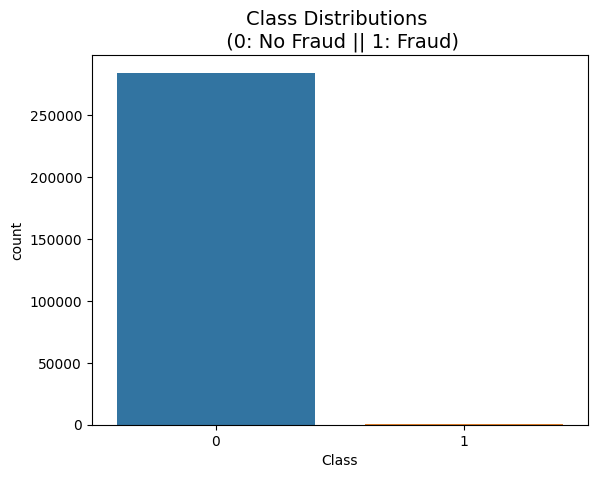

In [10]:
sns.countplot(x = 'Class', data=raw_data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

In [11]:
# 일단 X,y로 데이터 선정
X = raw_data.iloc[:,1:-1]
# [1:-1] : 타임과 클래스 컬럼 빼기, -1은 마지막에 있는 클래스
y = raw_data.iloc[:,-1]

X.shape, y.shape

((284807, 29), (284807,))

In [13]:
# 데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 13, stratify=y)

# 데이터 확인
np.unique(y_train, return_counts=True)

(array([0, 1]), array([199020,    344]))

In [14]:
tmp = np.unique(y_train, return_counts=True)[1]
tmp[1]/len(y_train)

0.0017254870488152324

In [15]:
np.unique(y_test, return_counts= True)

(array([0, 1]), array([85295,   148]))

In [16]:
tmp = np.unique(y_test, return_counts=True)[1]
tmp[1]/len(y_test)

0.0017321489179921118

### 1. ROW 데이터로 학습

In [17]:
# 분류기의 성능 함수 작성
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    return acc, pre, re, f1, auc

In [18]:
# 성능 출력 함수
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)

    print("==> confusion matrix")
    print(confusion)
    print("=========")

    print('Accuracy : {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print("Recall: {0:.4f}, F1 = {1:.4f}, AUC : {2:.4f}".format(re, f1, auc))

In [19]:
# Logisitic Regression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state = 13, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)


print_clf_eval(y_test, lr_pred)

==> confusion matrix
[[85284    11]
 [   60    88]]
Accuracy : 0.9992, Precision: 0.8889
Recall: 0.5946, F1 = 0.7126, AUC : 0.7972


In [20]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

==> confusion matrix
[[85281    14]
 [   42   106]]
Accuracy : 0.9993, Precision: 0.8833
Recall: 0.7162, F1 = 0.7910, AUC : 0.8580


In [21]:
# random tree
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13,n_jobs=-1,n_estimators=100)
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

==> confusion matrix
[[85290     5]
 [   38   110]]
Accuracy : 0.9995, Precision: 0.9565
Recall: 0.7432, F1 = 0.8365, AUC : 0.8716


In [23]:
# lightGBM

from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average= False)

lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)



==> confusion matrix
[[85289     6]
 [   34   114]]
Accuracy : 0.9995, Precision: 0.9500
Recall: 0.7703, F1 = 0.8507, AUC : 0.8851


In [24]:
# 모델과 데이터를 주면 성능을 출력하는 함수
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

In [25]:
# 다수의 모델의 성능을 정리해서 DataFrame으로 반환하는 함수

def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy','precision','recall', 'f1', 'roc_auc']
    tmp = []

    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))
    
    return pd.DataFrame(tmp, columns=col_names, index=model_names)

In [26]:
# 표로 정리
import time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LinearReg', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time :', time.time() - start_time)
results

Fit time : 60.162009954452515


,accuracy,precision,recall,f1,roc_auc
LinearReg,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999532,0.950000,0.770270,0.850746,0.885100


### 2. 데이터 전처리 (표준화) 후 학습

<Figure size 1000x500 with 0 Axes>

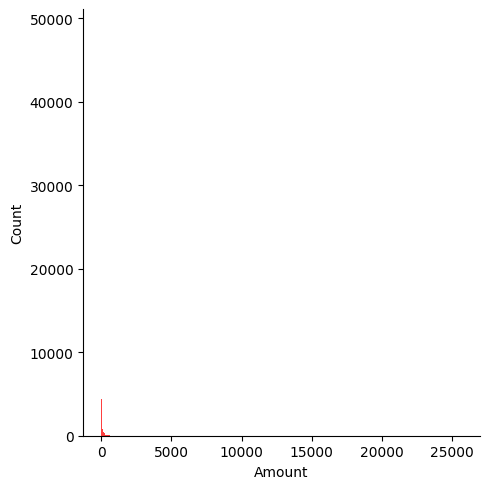

In [27]:
# raw_Data의 amount 컬럼 확인
plt.figure(figsize=(10,5))
sns.displot(raw_data['Amount'], color='r')

plt.show()

In [28]:
# Amount 컬럼에 standardScaler 적용

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
amount_n = scaler.fit_transform(raw_data['Amount'].values.reshape(-1,1))

raw_data_copy = raw_data.iloc[:,1:-2]
raw_data_copy['Amount_Scaled'] = amount_n
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [29]:
# 데이터를 다시 나눔
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 13, stratify=y)

In [30]:
# 모델에 다시 평가
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LinearReg','DecisionTree','RandomForest','LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time :', time.time() - start_time)
results

Fit time : 61.554407835006714


,accuracy,precision,recall,f1,roc_auc
LinearReg,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999532,0.950000,0.770270,0.850746,0.885100


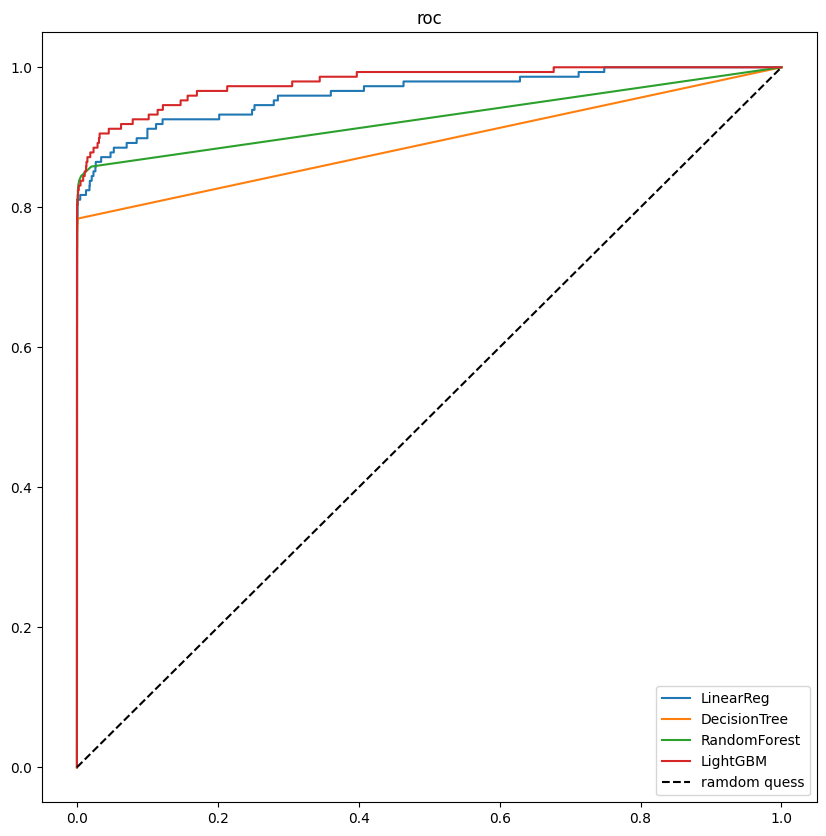

In [31]:
# 모델별 roc 커브

from sklearn.metrics import roc_curve

def draw_roc_curve(model, model_names,X_test, y_test):
    plt.figure(figsize=(10,10))

    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test,pred)
        plt.plot(fpr, tpr, label=model_names[model])
    
    plt.plot([0,1],[0,1], 'k--', label='ramdom quess')
    plt.title('roc')
    plt.legend()
    plt.show()

draw_roc_curve(models, model_names, X_test, y_test)
    

### 3. log scale를 활용하여 학습

- log scale는 비대칭 데이터를 처리하는데 많이 사용됨

In [32]:
# log scale

amount_log = np.log1p(raw_data['Amount'])

raw_data_copy['Amount_Scaled'] = amount_log
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539


/tmp/ipykernel_13381/1136324429.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data_copy['Amount_Scaled'], color='r')


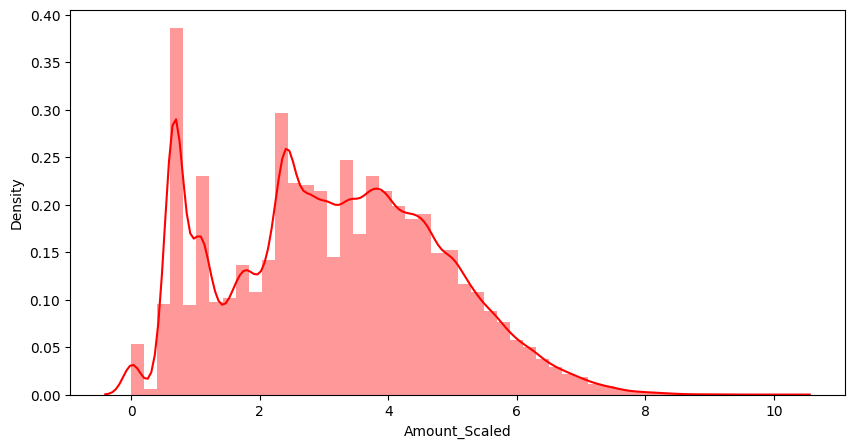

In [33]:
# 분포가 변함
plt.figure(figsize=(10,5))
sns.distplot(raw_data_copy['Amount_Scaled'], color='r')

plt.show()

In [34]:
# 다시 성능을 확인
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 13, stratify=y)

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print("Fit time :", time.time() - start_time)
results

Fit time : 54.97819519042969


,accuracy,precision,recall,f1,roc_auc
LinearReg,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999532,0.950000,0.770270,0.850746,0.885100


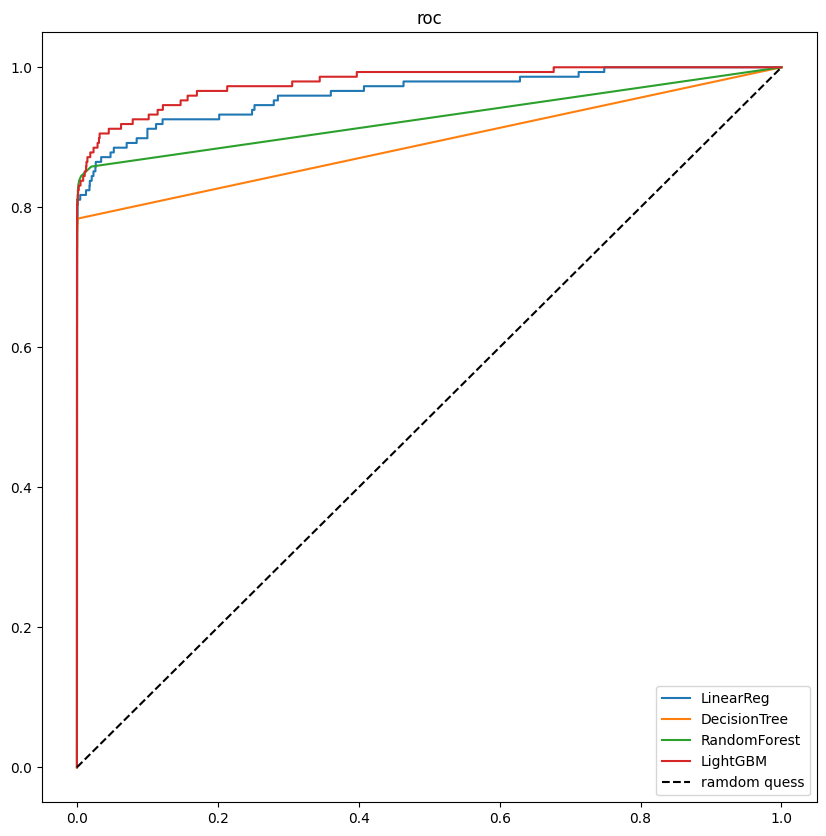

In [35]:
# roc 커브 결과
draw_roc_curve(models, model_names, X_test, y_test)

### 4. Outlier 처리 후 학습

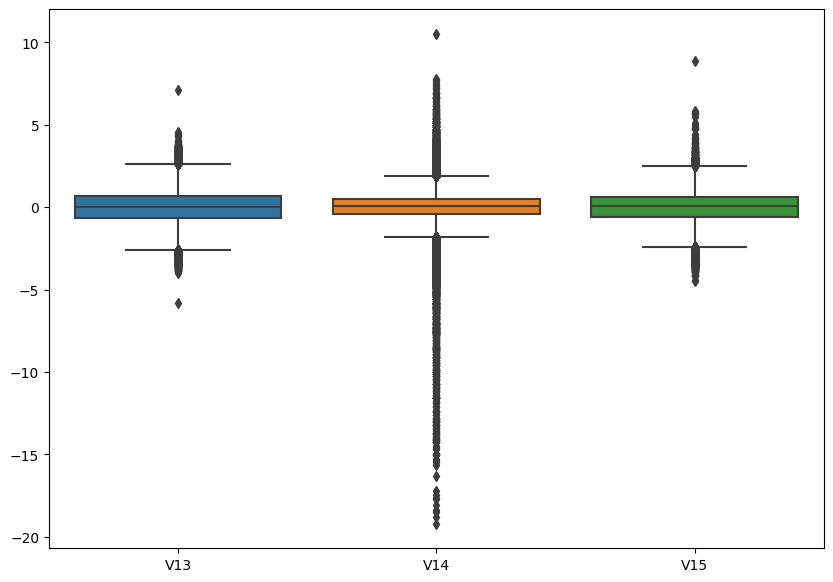

In [36]:
# BOX Plot으로 이상치 확인
import seaborn as sns

plt.figure(figsize=(10,7))
sns.boxplot(data=raw_data[['V13','V14', 'V15']]);

In [37]:
# outlier를 정리하기 위해 Outlier의 인덱스를 파악
def get_outlier (df=None, column=None, weight=1.5):
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_wight = iqr * weight
    lowest_val = quantile_25 - iqr_wight
    highest_val = quantile_75 + iqr_wight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index

    return outlier_index

In [38]:
# Outlier 찾기
get_outlier(df = raw_data, column='V14', weight=1.5)

Index([8296, 8615, 9035, 9252], dtype='int64')

In [39]:
# Outlier 제거
raw_data_copy.shape

(284807, 29)

In [40]:
outlier_index = get_outlier(df=raw_data, column='V14', weight=1.5)
raw_data_copy.drop(outlier_index, axis=0,inplace=True)
raw_data_copy.shape

(284803, 29)

In [41]:
# Outlier를 제거하고 데이터 나누기

X = raw_data_copy

raw_data.drop(outlier_index, axis=0,inplace=True)
y= raw_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

In [42]:
# 학습
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ["LinearReg", "DecisionTree", 'RandomForest','LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train,X_test, y_test)

print("Fit time :", time.time() - start_time)
results

Fit time : 50.53504800796509


,accuracy,precision,recall,f1,roc_auc
LinearReg,0.999286,0.904762,0.650685,0.756972,0.825284
DecisionTree,0.999427,0.870229,0.780822,0.823105,0.890311
RandomForest,0.999497,0.918699,0.773973,0.840149,0.886928
LightGBM,0.999602,0.951613,0.808219,0.874074,0.904074


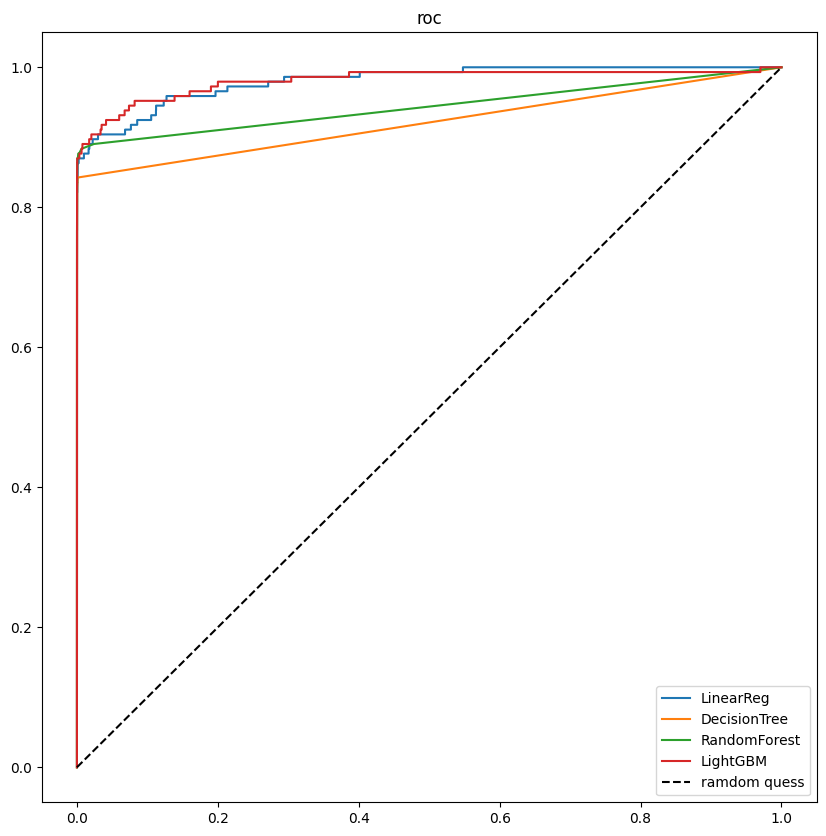

In [43]:
# ROC 커브
draw_roc_curve(models, model_names, X_test, y_test)

### 7. SMOTE 사용한 후 학습

In [44]:
# SMOTE 적용
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [45]:
# 데이터 증강 효과 확인
X_train.shape, y_train.shape

((199362, 29), (199362,))

In [46]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0, 1]), array([199020,    342]))
(array([0, 1]), array([199020, 199020]))


In [47]:
# 학습
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LinearReg','DecisionTree','RandomForest','LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time :', time.time() - start_time)
results

Fit time : 60.38862228393555


,accuracy,precision,recall,f1,roc_auc
LinearReg,0.999286,0.904762,0.650685,0.756972,0.825284
DecisionTree,0.999427,0.870229,0.780822,0.823105,0.890311
RandomForest,0.999497,0.918699,0.773973,0.840149,0.886928
LightGBM,0.999602,0.951613,0.808219,0.874074,0.904074


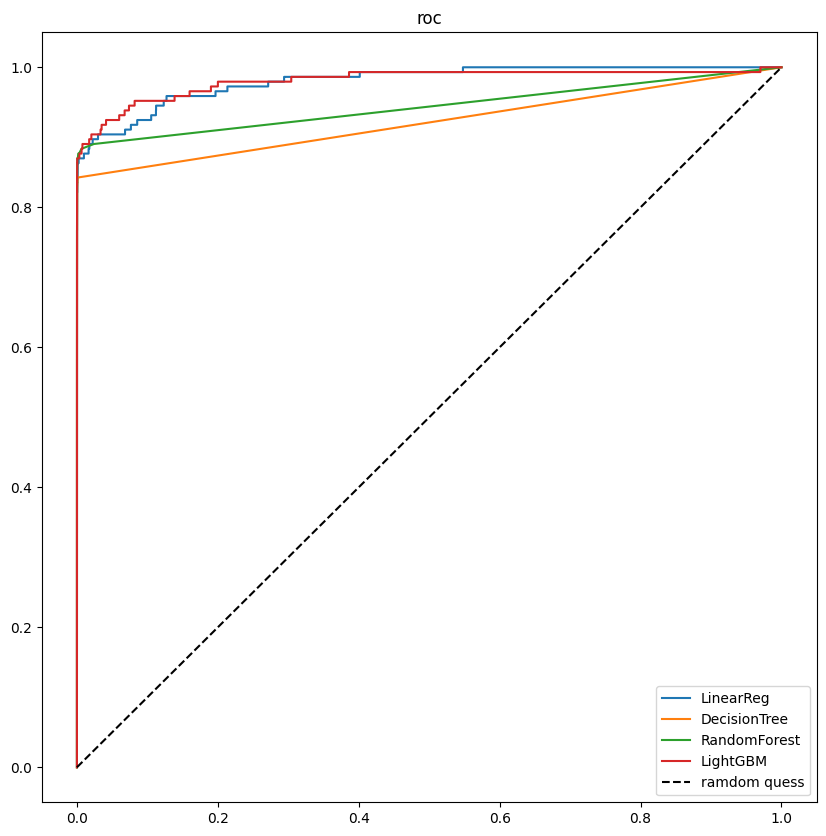

In [48]:
# ROC 커브
draw_roc_curve(models, model_names, X_test, y_test)